In [109]:
import pandas as pd
import gzip
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#reading the Amazon JSON data 
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

#getting the first million observations    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1 
    if i == 1000000:
        break
  return pd.DataFrame.from_dict(df, orient='index')

#showing the contents of the reviews dataframe
df_reviews = getDF('reviews_Books.json.gz')
df_reviews.head()



,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...


In [3]:
#renaming column names for the df_Reviews dataframe
df_reviews = df_reviews.rename(columns={'overall': 'ReviewRating', 'summary': 'RevSummary'})
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,ReviewRating,reviewTime,RevSummary
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...


In [4]:
len(df_reviews)

1000000

In [5]:
##showing the contents of the Meta dataframe
df_meta = getDF('meta_Books.json.gz')
df_meta.head()

,asin,salesRank,imUrl,categories,title,description,related,price,brand
0,0001048791,{u'Books': 6334800},http://ecx.images-amazon.com/images/I/51MKP0T4...,[[Books]],"The Crucible: Performed by Stuart Pankin, Jero...",None,None,NaN,None
1,0001048775,{u'Books': 13243226},http://ecx.images-amazon.com/images/I/5166EBHD...,[[Books]],Measure for Measure: Complete &amp; Unabridged,William Shakespeare is widely regarded as the ...,None,NaN,None
2,0001048236,{u'Books': 8973864},http://ecx.images-amazon.com/images/I/51DH145C...,[[Books]],The Sherlock Holmes Audio Collection,"&#34;One thing is certain, Sherlockians, put a...","{u'also_viewed': [u'1442300191', u'9626349786'...",9.26,None
3,0000401048,{u'Books': 6448843},http://ecx.images-amazon.com/images/I/41bchvIf...,[[Books]],The rogue of publishers' row;: Confessions of ...,None,{u'also_viewed': [u'068240103X']},NaN,None
4,0001019880,{u'Books': 9589258},http://ecx.images-amazon.com/images/I/61LcHUdv...,[[Books]],Classic Soul Winner's New Testament Bible,None,"{u'also_viewed': [u'B003HMB5FC', u'0834004593'...",5.39,None


In [6]:
#making sure the length is 1 million
len(df_meta)

1000000

In [7]:
#merging the meta dataframe with the reviews dataframe
df_reviews = df_reviews.merge(df_meta)
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None


In [9]:
#dropping unused columns
df_reviews = df_reviews.drop('unixReviewTime',1)
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None


In [11]:
#computing average rating for BOOKS
print sum(df_reviews.ReviewRating) / len(df_reviews.ReviewRating)

4.22772


In [17]:
#dropping observations without a userid
df_reviews = df_reviews.dropna(subset=['reviewerID','asin'])

In [19]:
df_reviews = df_reviews[df_reviews.reviewerID!= "None"]
len(df_reviews)

1000000

In [20]:
df_reviews = df_reviews[df_reviews.asin!= "None"]
len(df_reviews)

1000000

In [118]:
#computing average helpful rating
df_reviews['helpful-max'] = df_reviews['helpful'].str[-2:-1]



In [119]:
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand,yr,helpful-max
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None,2002,[5]
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None,2014,[0]
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None,2002,[10]
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,2013,[0]
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,2013,[0]


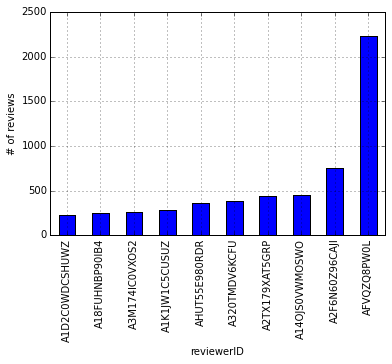

In [112]:
#Top 10 users posting the most reviews
freq_users = df_reviews.groupby(['reviewerID']).size()
freq_users.order().tail(10).plot(kind='bar')
plt.ylabel('# of reviews')

In [98]:
df_reviews['yr'] = df_reviews['reviewTime'].str[-4:].astype(int)

In [99]:
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand,yr
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None,2002
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None,2014
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None,2002
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,2013
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,2013


In [100]:
#top 10 users across years
top_user = df_reviews[df_reviews.reviewerID=="AFVQZQ8PW0L"]
top_user.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand,yr
17165,AFVQZQ8PW0L,0002326876,Harriet Klausner,"[1, 1]","On the Island of Mallorca, though the case is ...",4,"04 16, 2001",An atmospheric mystery that is a good read,{u'Books': 10959482},http://ecx.images-amazon.com/images/I/51Q7MPPY...,[[Books]],The Ambiguity of Murder (Inspector Alvarez Novel),"Murder will out, and does, in this latest addi...",None,NaN,None,2001
20489,AFVQZQ8PW0L,0006353282,Harriet Klausner,"[9, 10]",This is a reprint of Agatha Christie's autobio...,5,"11 22, 2011",wonderful look at the life of the Grand Dame o...,{u'Books': 1127575},http://ecx.images-amazon.com/images/I/41K1B7EG...,[[Books]],An Autobiography,'Wonderfully easy to read and engrossing.' The...,"{u'also_bought': [u'0062093703', u'0061988375'...",6.64,None,2011
20975,AFVQZQ8PW0L,0006392202,Harriet Klausner,"[9, 10]",Barth Crane is a high powered Toronto attorney...,5,"05 9, 2000",Excellent surreal mystery,{u'Books': 10187194},http://ecx.images-amazon.com/images/I/41GR6W1C...,[[Books]],Lost Girls,None,"{u'also_bought': [u'1451697414', u'0312429037'...",8.89,None,2000
21186,AFVQZQ8PW0L,000639325X,Harriet Klausner,"[8, 9]",San Francisco computer programmer Paul Wood en...,4,"06 26, 2004",entertaining chilling thriller,{u'Books': 8676540},http://ecx.images-amazon.com/images/I/41APXQN7...,[[Books]],Dark Places,None,"{u'buy_after_viewing': [u'0307341577', u'03073...",0.00,None,2004
24712,AFVQZQ8PW0L,0006512666,Harriet Klausner,"[4, 8]",In a future world a lot weirder than the prese...,5,"09 9, 2000",great offbeat read,{u'Books': 2595605},http://ecx.images-amazon.com/images/I/413Q-gph...,[[Books]],Only Forward,The dazzling pyrotechnics of British author Sm...,"{u'also_viewed': [u'B003H4RCXY', u'0553580698'...",6.64,None,2000


In [101]:
len(top_user)

2237

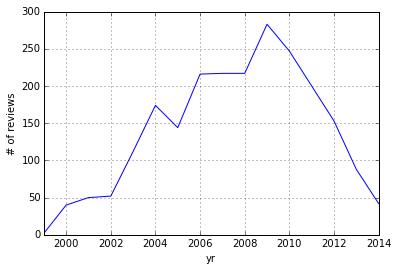

In [111]:
#top user reviews per year

top_user.groupby(['yr']).size().plot()
plt.ylabel('# of reviews')


17165    None
20489    None
20975    None
21186    None
24712    None
25981    None
26077    None
29141    None
29255    None
30320    None
30486    None
31085    None
36150    None
38354    None
39586    None
...
985523    None
985577    None
985676    None
988627    None
988957    None
989205    None
989498    None
989992    None
995452    None
997102    None
997686    None
998077    None
999056    None
999727    None
999886    None
Name: year, Length: 2237, dtype: object